In [23]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.loaders import load_model, load_data_partition
import pandas as pd


In [24]:
other_data = pd.read_csv('../output-other-label/features/freesound_features.csv')
other_data_without_brass = pd.read_csv('../output-other-label/features/features_brass.csv')

In [25]:
model = load_model('../models/lgbm_v1.pkl')
model_brass = load_model('../models/lgbm_brass_v1.pkl')

In [26]:
model_brass.classes_

['bass', 'brass', 'drums', 'guitar', 'keyboards', 'vocals', 'other']

In [27]:
other_data_without_brass = other_data_without_brass[other_data_without_brass['label'] != 'brass']

In [41]:
other_data.columns
x = other_data.drop(['label', 'filename', 'frame', 'track_id'], axis=1).to_numpy()
y = other_data['label'].to_numpy()

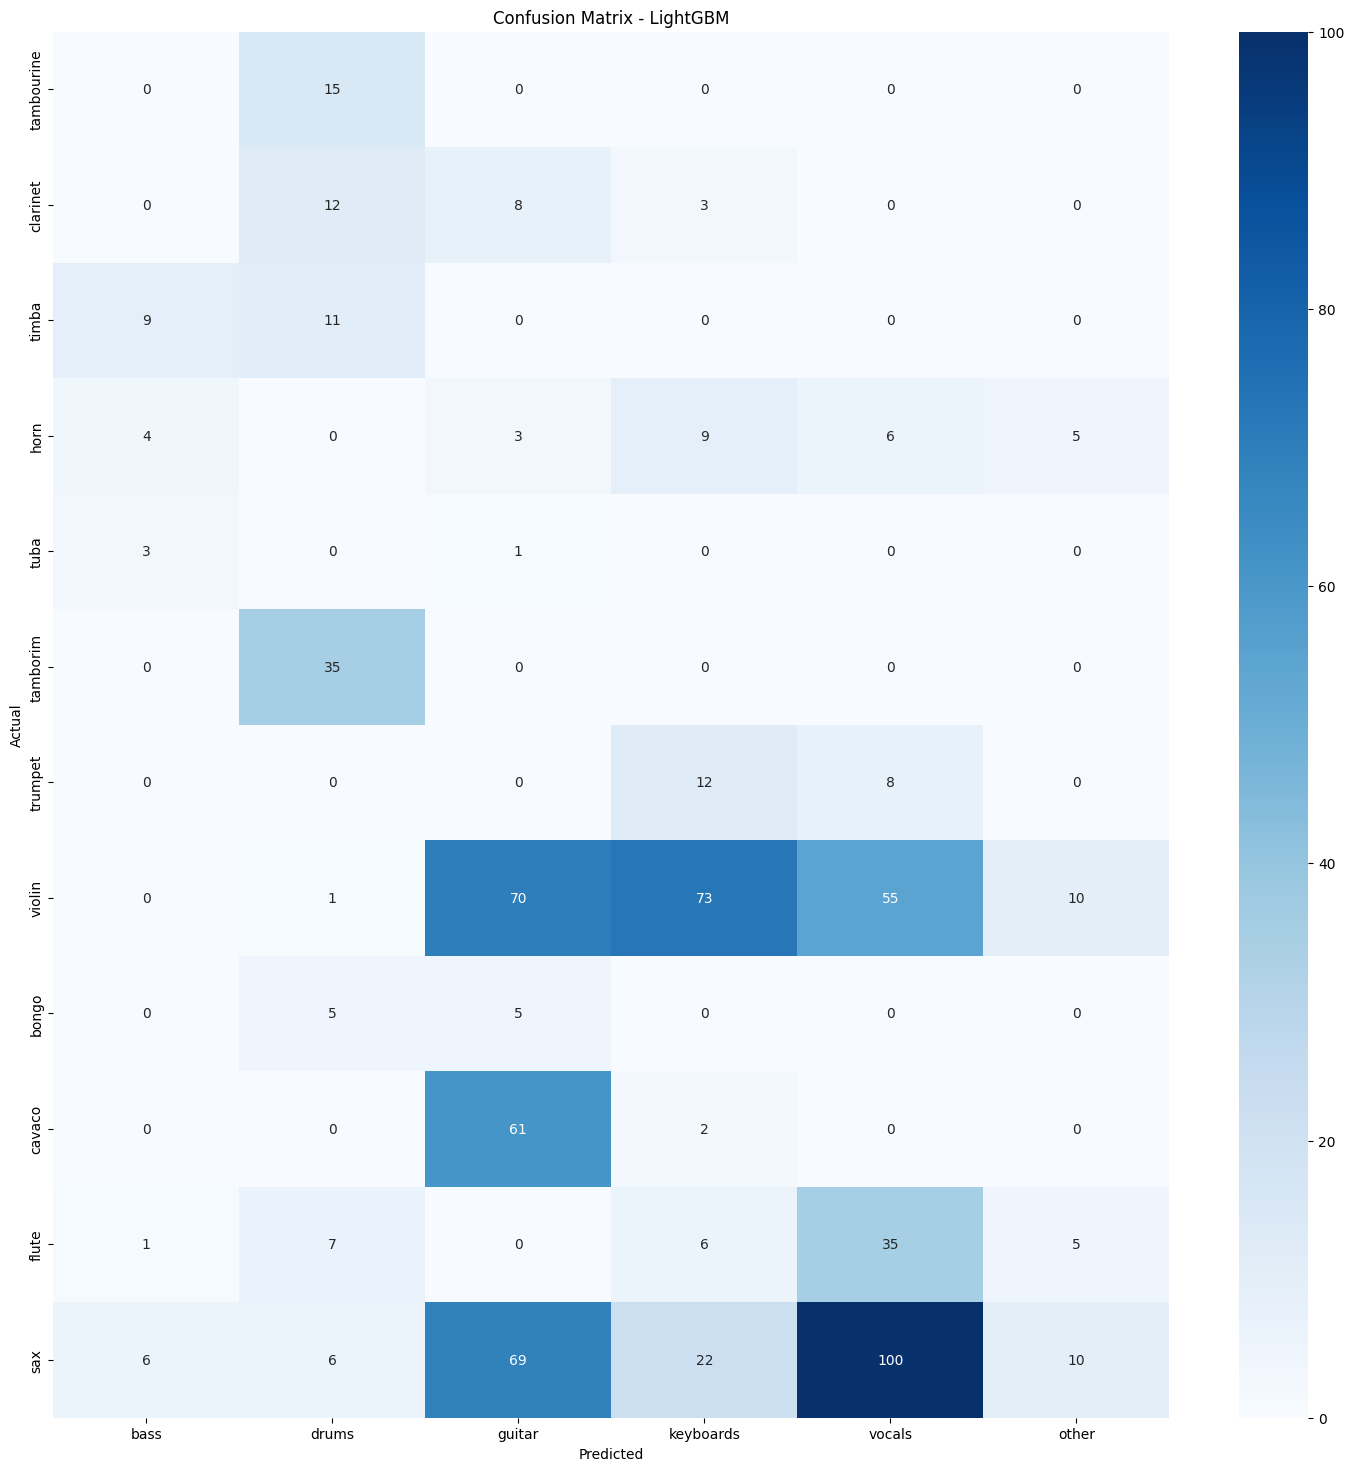

In [42]:
y_pred = model.predict(x)
labels = model.classes_ + list(set(y))
cm = confusion_matrix(y, y_pred, labels=labels)

plt.figure(figsize=(len(labels), len(labels)))
sns.heatmap(
    cm[6:, :6],
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=model.classes_,
    yticklabels=set(y),
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {model.name}')
plt.show()

/var/folders/ct/39gzl8dx18n1bg_14g_gcq4w0000gn/T/ipykernel_33057/3000477723.py:5: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


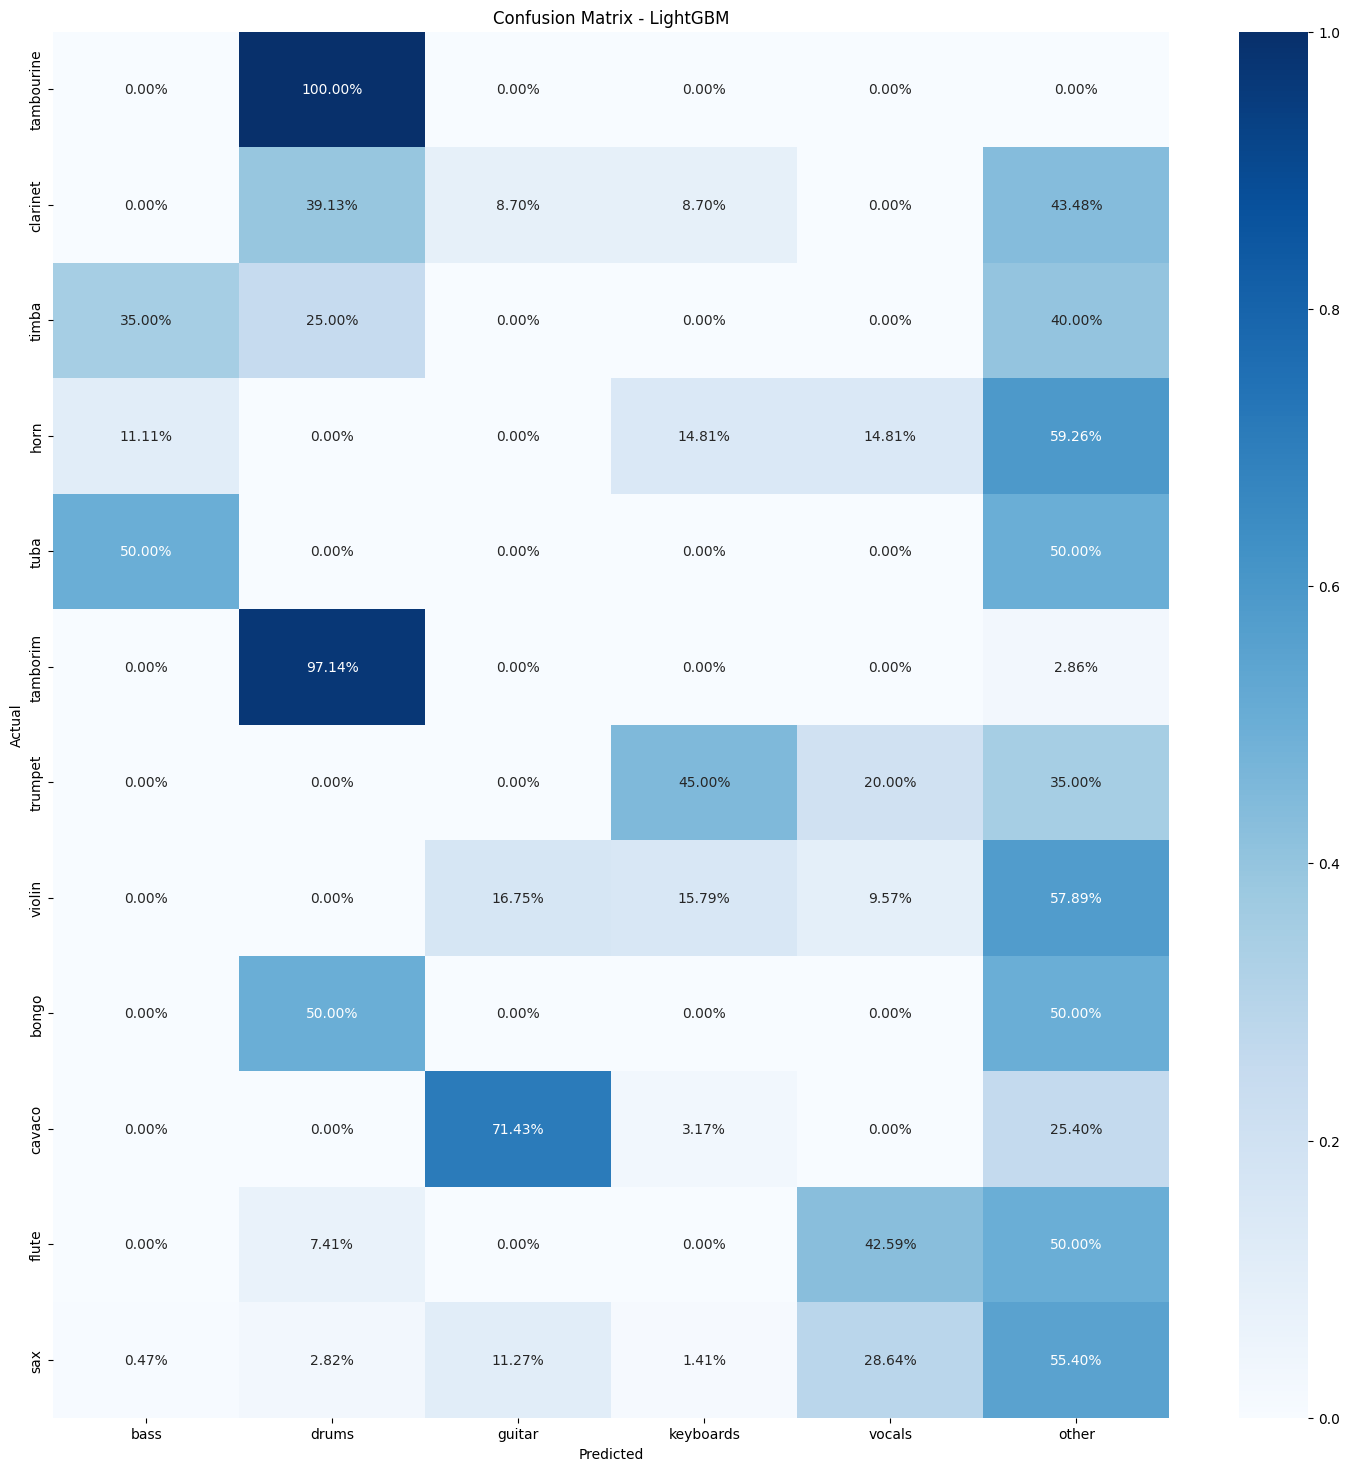

In [43]:
y_pred = model.predict(x, threshold=0.9)
labels = model.classes_ + list(set(y))
cm = confusion_matrix(y, y_pred, labels=labels)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(len(labels), len(labels)))
sns.heatmap(
    cm[6:, :6],
    annot=True,
    fmt='.2%',
    cmap='Blues',
    xticklabels=model.classes_,
    yticklabels=set(y),
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {model.name}')
plt.show()

In [44]:
x = other_data_without_brass.drop(['label', 'filename', 'frame', 'track_id'], axis=1).to_numpy()
y = other_data_without_brass['label'].to_numpy()

/var/folders/ct/39gzl8dx18n1bg_14g_gcq4w0000gn/T/ipykernel_33057/882559046.py:5: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


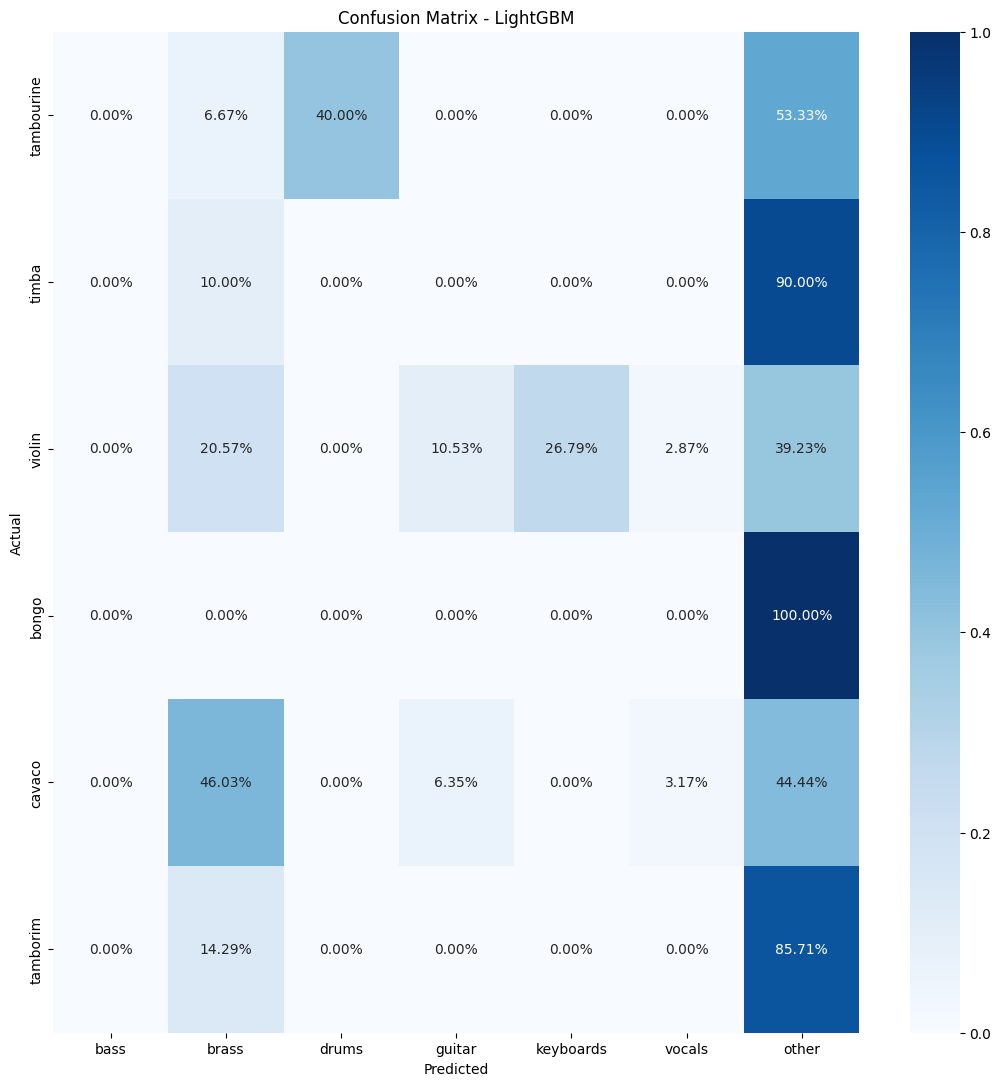

In [45]:
y_pred = model_brass.predict(x, threshold=0.9)
labels = model_brass.classes_ + list(set(y))
cm = confusion_matrix(y, y_pred, labels=labels)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(len(labels), len(labels)))
sns.heatmap(
    cm[7:, :7],
    annot=True,
    fmt='.2%',
    cmap='Blues',
    xticklabels=model_brass.classes_,
    yticklabels=set(y),
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {model.name}')
plt.show()

In [37]:
y_pred

array(['keyboards', 'vocals', 'brass', 'vocals', 'guitar', 'vocals',
       'vocals', 'keyboards', 'keyboards', 'keyboards', 'brass', 'other',
       'keyboards', 'brass', 'brass', 'brass', 'drums', 'brass', 'other',
       'drums', 'other', 'brass', 'other', 'brass', 'brass', 'brass',
       'brass', 'brass', 'brass', 'brass', 'brass', 'brass', 'brass',
       'brass', 'brass', 'brass', 'brass', 'keyboards', 'keyboards',
       'keyboards', 'keyboards', 'brass', 'brass', 'keyboards', 'other',
       'brass', 'brass', 'brass', 'keyboards', 'guitar', 'other',
       'vocals', 'other', 'brass', 'keyboards', 'keyboards', 'vocals',
       'keyboards', 'keyboards', 'keyboards', 'drums', 'brass', 'drums',
       'brass', 'brass', 'brass', 'vocals', 'keyboards', 'vocals',
       'keyboards', 'vocals', 'keyboards', 'keyboards', 'brass',
       'keyboards', 'guitar', 'keyboards', 'keyboards', 'guitar',
       'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar',
       'guitar', 'guitar',